In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

In [4]:
import pickle
with open('newsgroups', 'rb') as f:
  newsgroup_data= pickle.load(f)

In [5]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

cleaned_data = [clean_text(doc) for doc in newsgroup_data]


In [6]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_data = count_vectorizer.fit_transform(cleaned_data)
number_topics=4
lda=LatentDirichletAllocation(n_components=number_topics,random_state=0, n_jobs=1)

lda.fit(count_data)


LatentDirichletAllocation(n_components=4, n_jobs=1, random_state=0)

In [7]:
number_words = 10
def print_topics(model, count_vectorizer, n_top_words):
  words= count_vectorizer.get_feature_names_out()
  for topic_idx, topic in enumerate(model.components_):
    print("\nTopic #%d:" %topic_idx)
    print(" ".join([words[i]
                    for i in topic.argsort() [:-n_top_words - 1:-1]]))

print_topics(lda,count_vectorizer, number_words)


Topic #0:
don just think like 25 good year car people time

Topic #1:
edu com like just don new use does thanks know

Topic #2:
55 drive disk use know does hard just game drives

Topic #3:
space nasa data new like god just information 10 science


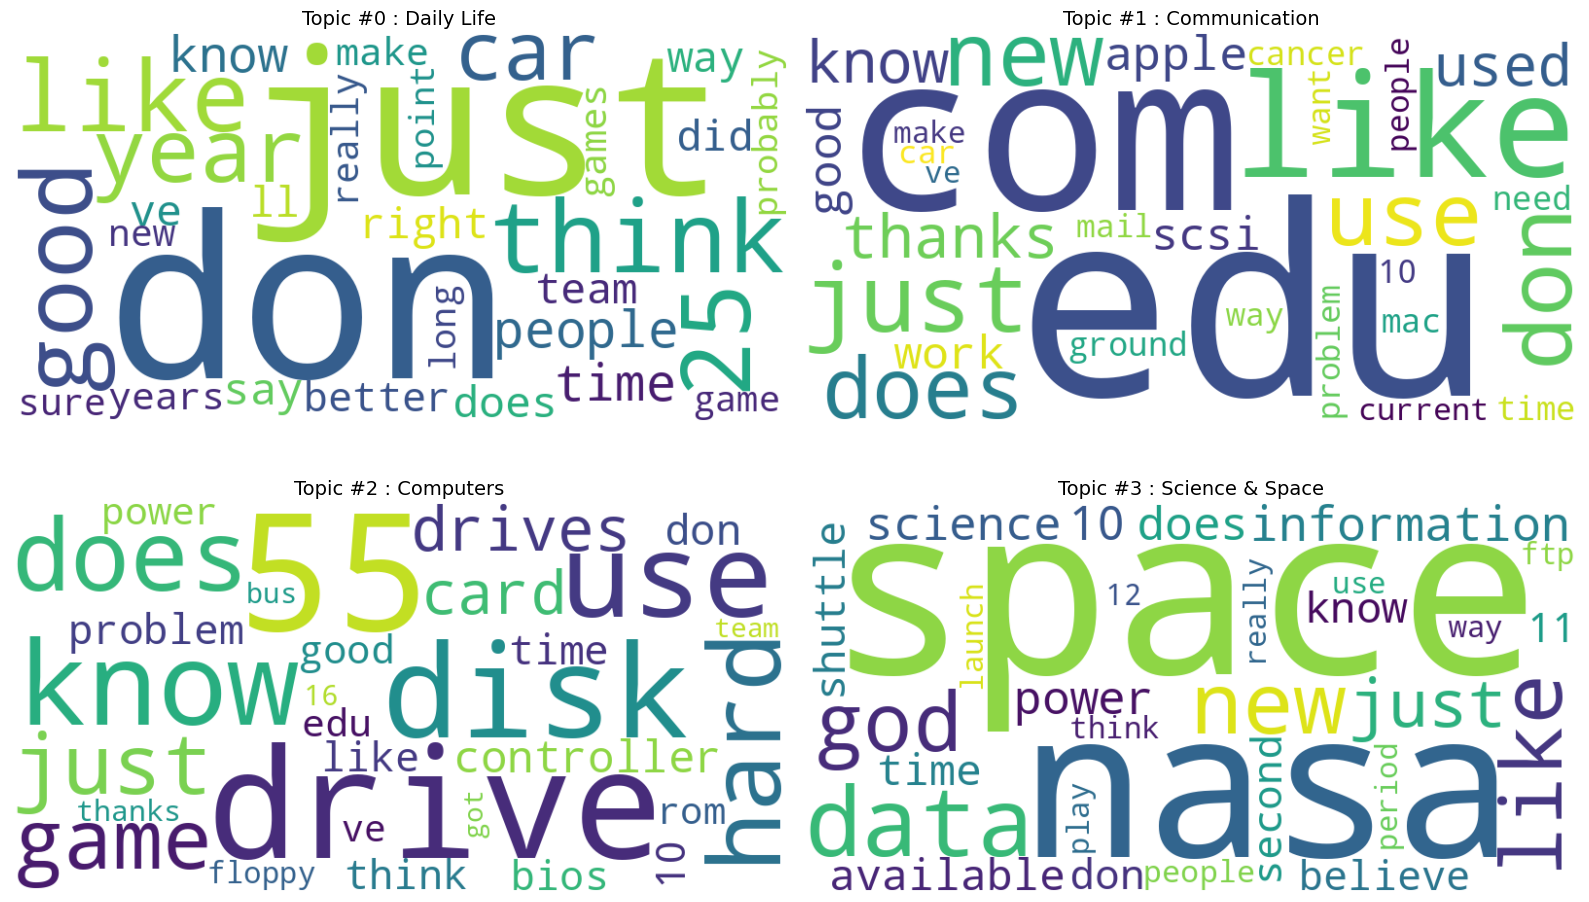

In [9]:
import matplotlib.pyplot as plt
topic_names = [
    "Daily Life",
    "Communication",
    "Computers",
    "Science & Space"
]


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
words = count_vectorizer.get_feature_names_out()
for idx, ax in enumerate(axes.flatten()):
    topic_words = lda.components_[idx]
    word_freq = {words[i]: topic_words[i] for i in topic_words.argsort()[:-30 - 1:-1]}

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic #{idx} : {topic_names[idx]}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()



In [13]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
tf_vectorizer = TfidfVectorizer(max_features=1500, stop_words='english')
A = tf_vectorizer.fit_transform(cleaned_data)
words=np.array(tf_vectorizer.get_feature_names_out())

nmf = NMF(n_components=4, solver ='mu')
W= nmf.fit_transform(A)
H = nmf.components_

for i, topic in enumerate(H):
    top_words = [words[j] for j in topic.argsort()[-10:]]
    print(f"\nTopic #{i + 1}: {', '.join(top_words)}")


Topic #1: ve, know, time, good, car, people, think, like, just, don

Topic #2: apple, controller, use, mac, does, disk, card, scsi, thanks, drive

Topic #3: pitt, shameful, n3jxp, chastity, intellect, dsl, skepticism, cadre, geb, edu

Topic #4: league, win, hockey, play, season, players, games, team, year, game


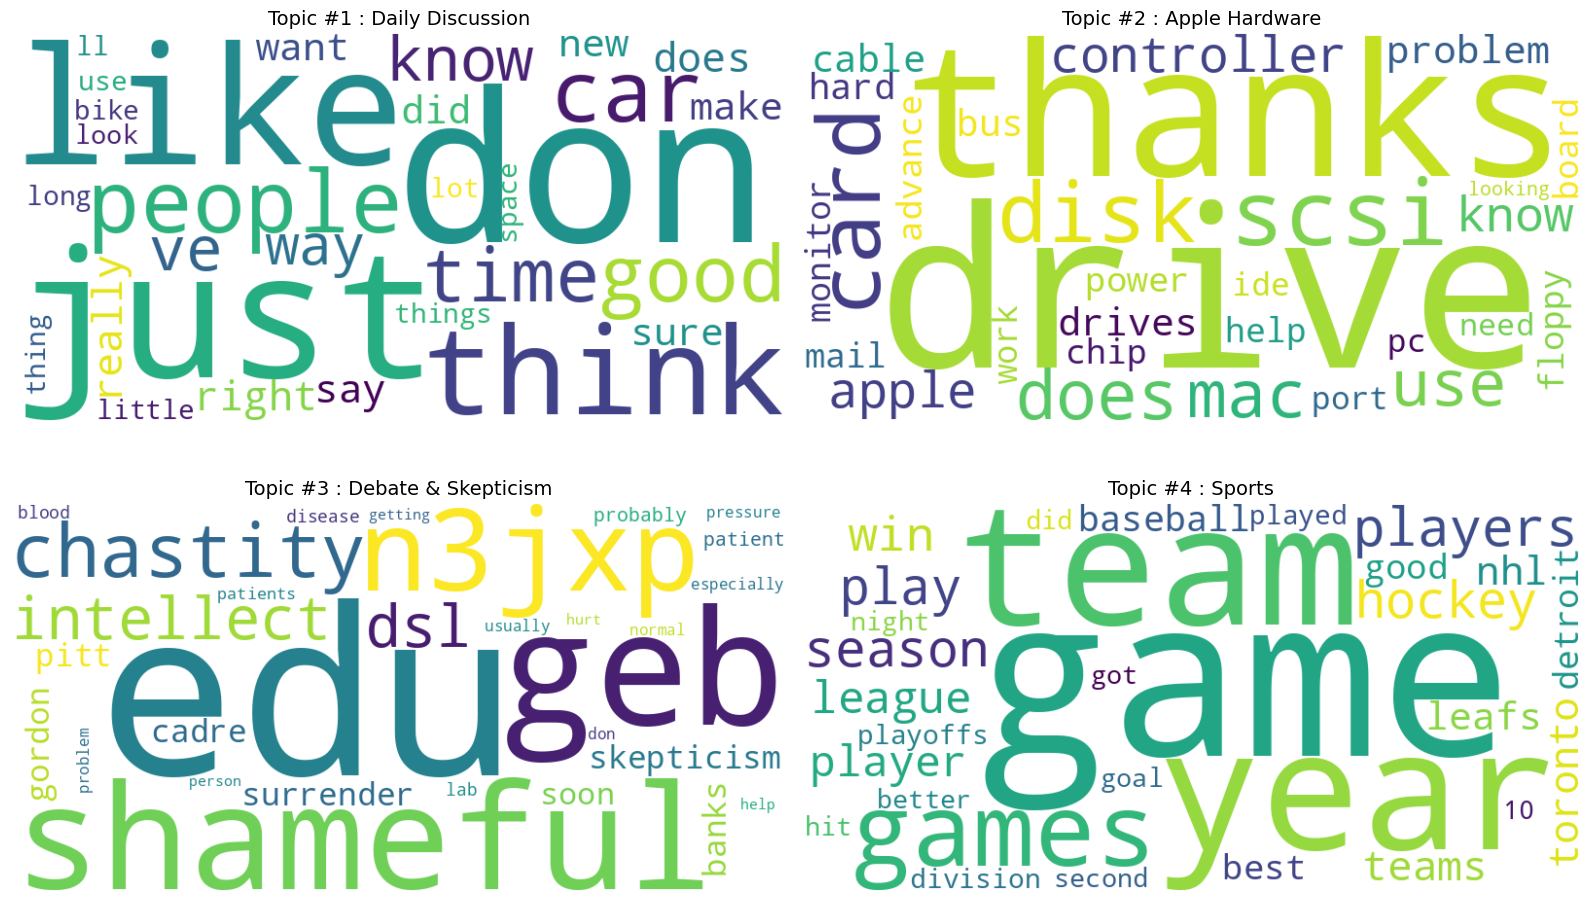

In [14]:
nmf_topic_names = [
    "Daily Discussion",
    "Apple Hardware",
    "Debate & Skepticism",
    "Sports"
]


words = tf_vectorizer.get_feature_names_out()


fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, ax in enumerate(axes.flatten()):
    topic_words = H[idx]
    word_freq = {words[i]: topic_words[i] for i in topic_words.argsort()[-30:]}

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic #{idx + 1} : {nmf_topic_names[idx]}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()
